<a href="https://colab.research.google.com/github/Priya-bk/calculator_app/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
print(colored('\nAll libraries imported succesfully', 'green'))



All libraries imported succesfully


In [2]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749
Potability,2011.0,0.403282,0.490678,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.skew(axis=0, skipna=True)

ph                 0.048947
Hardness          -0.085237
Solids             0.595894
Chloramines        0.012976
Sulfate           -0.046558
Conductivity       0.266869
Organic_carbon    -0.020018
Trihalomethanes   -0.051422
Turbidity         -0.033051
Potability         0.394614
dtype: float64

Correlation

In [8]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


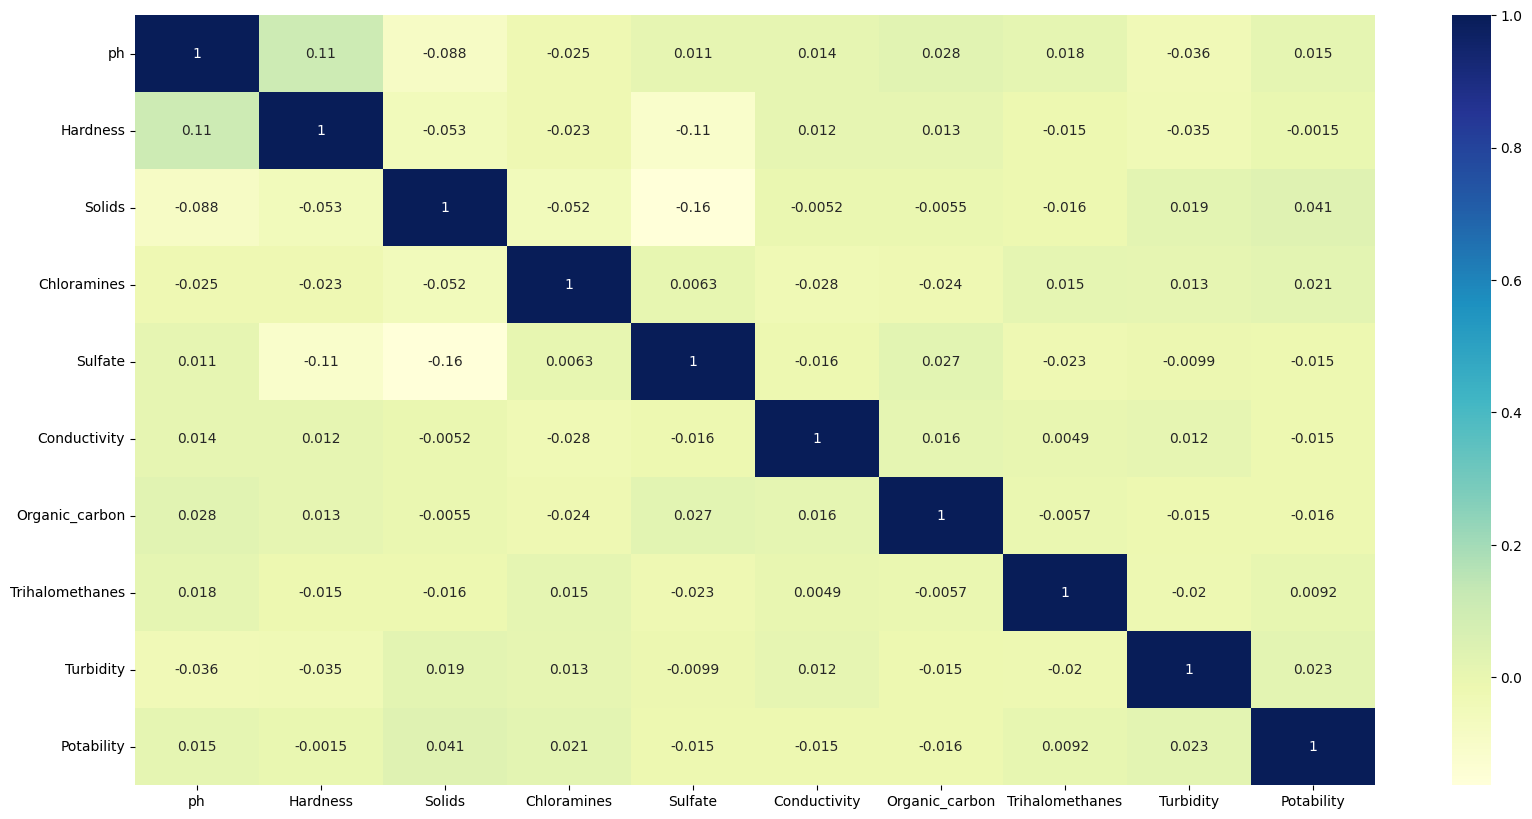

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)
plt.show()

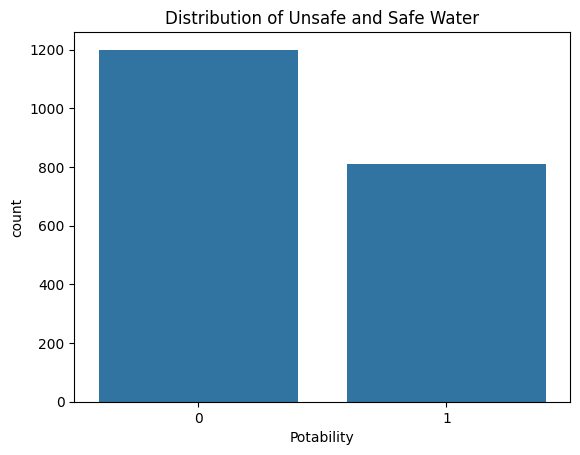

In [10]:
sns.countplot(x ='Potability', data = df)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [11]:
df.groupby('Potability').mean().T

Potability,0,1
ph,7.067201,7.113791
Hardness,196.008440,195.908341
Solids,21628.535122,22344.922883
Chloramines,7.107267,7.174395
Sulfate,333.742928,332.457832
Conductivity,427.554342,425.005423
Organic_carbon,14.400250,14.294764
Trihalomethanes,66.278712,66.581596
Turbidity,3.955181,3.991254


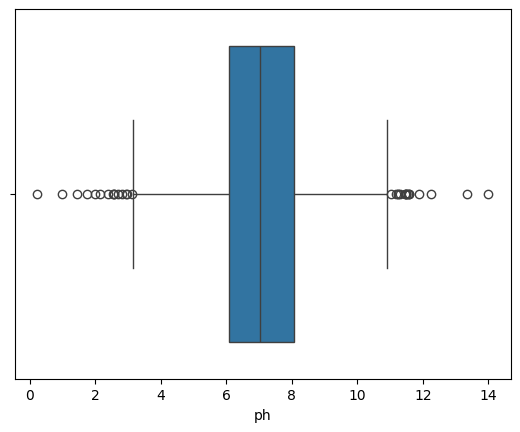

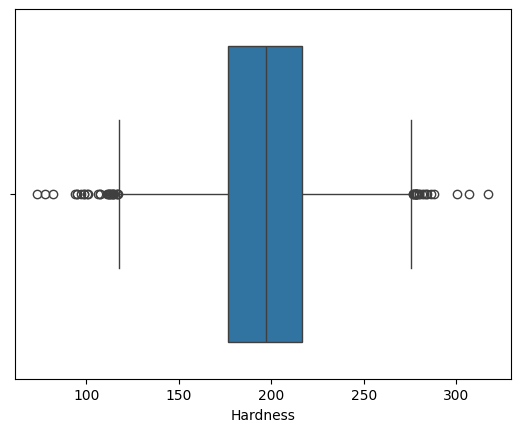

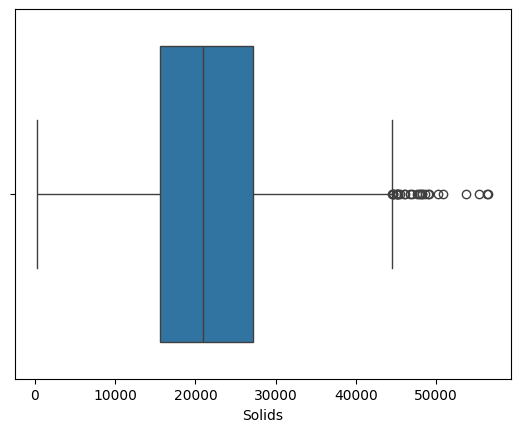

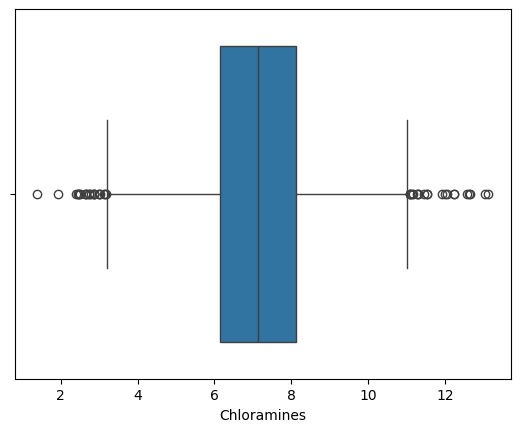

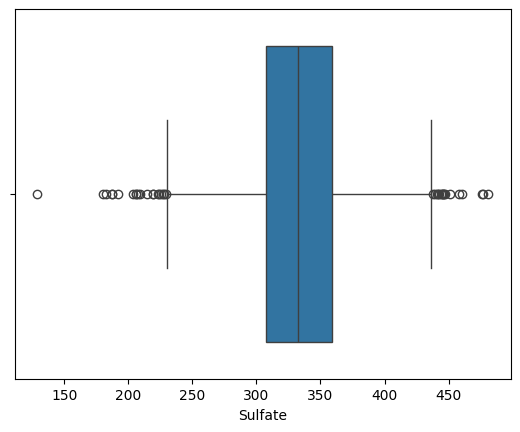

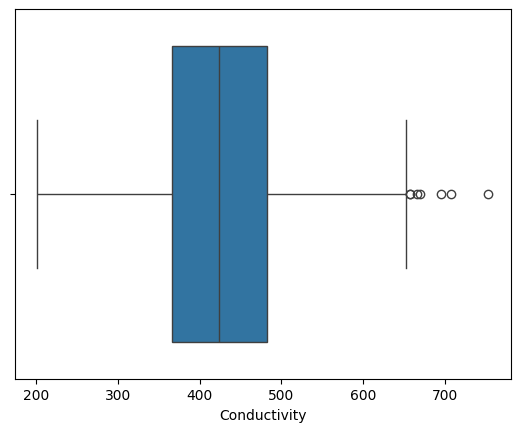

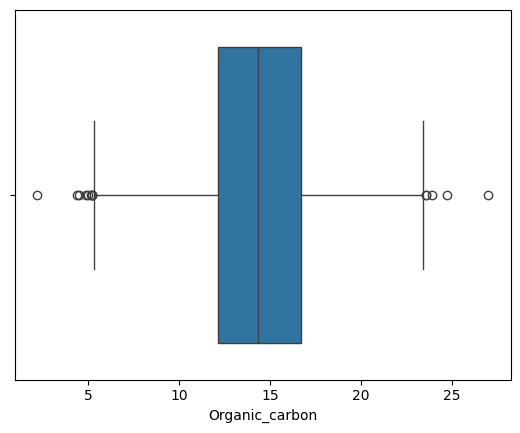

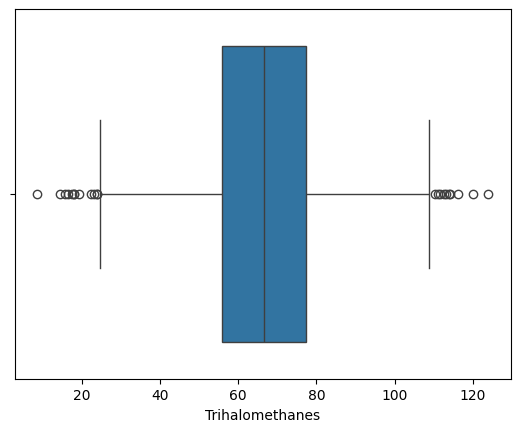

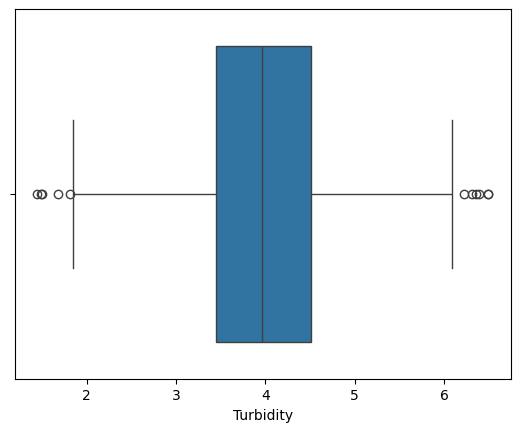

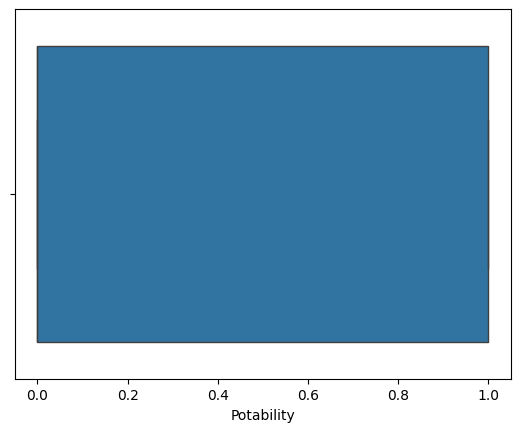

In [12]:
for col in df.columns:
  sns.boxplot(data=df, x=col)
  plt.show()

<Axes: xlabel='Potability'>

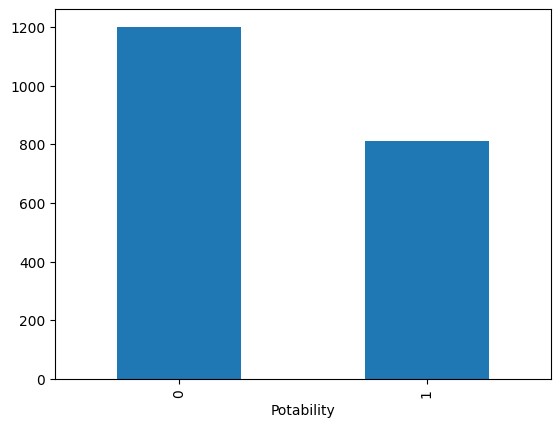

In [13]:
#sns.countplot(df['Potability'])
df['Potability'].value_counts().plot(kind= 'bar')

PCA(Principle Component Analysis)


In [14]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()
for n in range(1, 6):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.999873
2,PCA(n_components=2),0.99996
3,PCA(n_components=3),0.999983
4,PCA(n_components=4),0.999996
5,PCA(n_components=5),1.0


In [15]:
feature_df = (pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values'))
Importantfeature  = feature_df.drop('Potability', axis = 1)
Importantfeature

features,Chloramines,Conductivity,Hardness,Organic_carbon,Solids,Sulfate,Trihalomethanes,Turbidity,ph
n,,,,,,,,,
1,0.000009,0.000048,0.000201,0.000002,0.998915,0.000775,0.000029,0.000002,0.000016
2,0.000282,0.494671,0.003005,0.000317,0.494710,0.006244,0.000520,0.000061,0.000142
3,0.000199,0.310666,0.076109,0.000773,0.306943,0.301421,0.003426,0.000040,0.000363
4,0.000429,0.225647,0.270650,0.001046,0.222409,0.272073,0.006094,0.000221,0.001379
5,0.000593,0.183682,0.222519,0.001029,0.180887,0.223758,0.185598,0.000368,0.001470


[Text(0.5, 0, 'Number of dimensions'),
 Text(0, 0.5, 'percent explained varince'),
 Text(0.5, 1.0, 'Explained varince vs dimensions')]

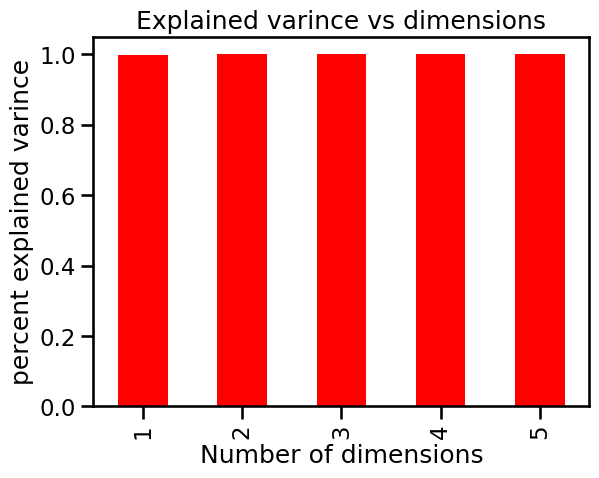

In [16]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar', color='red')
ax.set(xlabel = 'Number of dimensions',
      ylabel='percent explained varince',
      title='Explained varince vs dimensions')

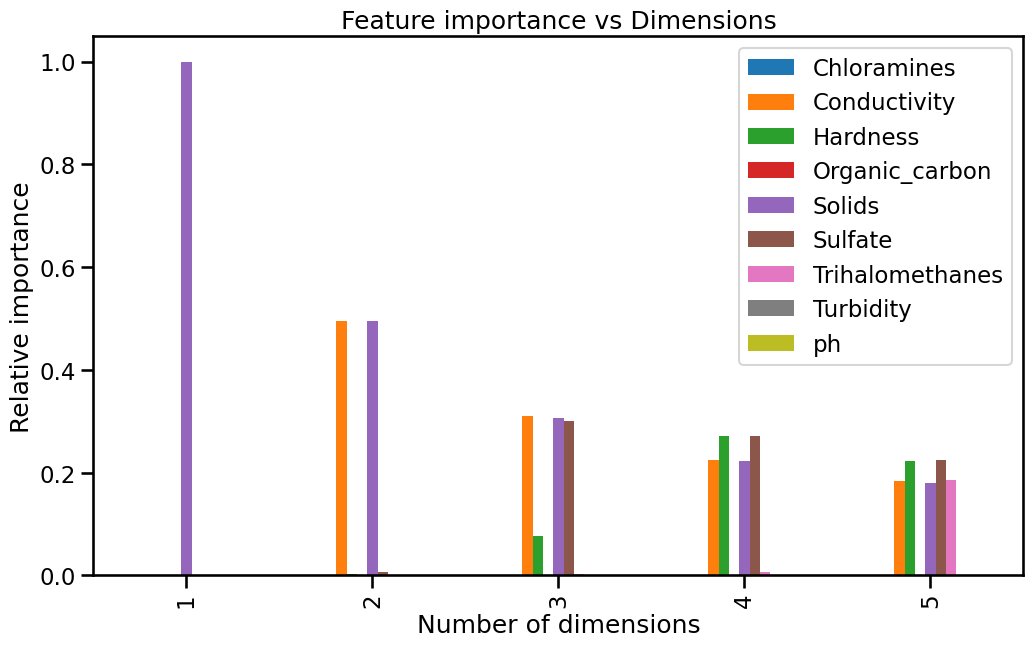

In [17]:
ax = Importantfeature.plot(kind='bar', figsize=(12,7))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [38]:
import pandas as pd
df = pd.read_csv('/content/water_potability.csv')
columns_to_drop = ['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Potability']
x = df.drop(columns=columns_to_drop)
y = df['Potability']



In [39]:
x.head()

,Solids,Turbidity
0,20791.318981,2.963135
1,18630.057858,4.500656
2,19909.541732,3.055934
3,22018.417441,4.628771
4,17978.986339,4.075075


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [20]:
y.head()

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [42]:
Importantfeature_scaled = std_scaler.fit_transform(x)
Importantfeature_scaled

array([[-0.13947087, -1.28629758],
       [-0.38598665,  0.68421789],
       [-0.24004734, -1.16736546],
       ...,
       [ 1.27080989, -0.85600678],
       [-1.14405809,  0.95079738],
       [-0.52581194, -2.12445866]])

In [43]:
df_input.shape

(2011, 2)

Training and Testing Dataset

In [44]:
x_train, x_test, y_train, y_test = train_test_split(Importantfeature_scaled, y, test_size= 0.20, shuffle= True, random_state= 0)

In [45]:
x_train.shape, x_test.shape

((2620, 2), (656, 2))

In [46]:
x

,Solids,Turbidity
0,20791.318981,2.963135
1,18630.057858,4.500656
2,19909.541732,3.055934
3,22018.417441,4.628771
4,17978.986339,4.075075
...,...,...
3271,47580.991603,4.435821
3272,17329.802160,2.798243
3273,33155.578218,3.298875
3274,11983.869376,4.708658


In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [48]:
x_train

array([[ 1.52038128, -1.49773516],
       [-0.95157469, -0.77140024],
       [-1.17598897, -0.5854205 ],
       ...,
       [-0.77992706, -0.17558511],
       [ 0.18922825,  1.37604146],
       [-0.92056959,  0.22398355]])

In [49]:
y_train

2128    0
1519    1
40      0
1151    1
2404    1
       ..
835     0
3264    1
1653    0
2607    0
2732    1
Name: Potability, Length: 2620, dtype: int64

In [50]:
x_test

array([[ 1.84441067,  0.59462529],
       [ 0.20290768,  0.22943605],
       [-0.49143033,  0.04144669],
       ...,
       [ 0.69816608, -0.50907932],
       [ 0.11253615, -0.23616222],
       [ 0.29813   , -0.32903386]])

In [51]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: Potability, Length: 656, dtype: int64

Models:

In [52]:
x_train, x_test, y_train, y_test = train_test_split(Importantfeature_scaled, y, random_state=0, test_size=0.2)

In [53]:
KNN = KNeighborsClassifier()
SVM = SVC()
DT  = DecisionTreeClassifier()

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
models = [KNN, SVM, DT]
features = Importantfeature_scaled
labels = y
CV = 5
accu_list = []
ModelName = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring = 'accuracy',cv = CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model" : ModelName, "Cross_Val_Accuracy" : accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,KNeighborsClassifier,56.623208
1,SVC,60.989015
2,DecisionTreeClassifier,52.868972


In [56]:
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [57]:
KNN.fit(x_train, y_train)
SVM.fit(x_train, y_train)
DT.fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)
y_pred_svm = SVM.predict(x_test)
y_pred_dt = DT.predict(x_test)

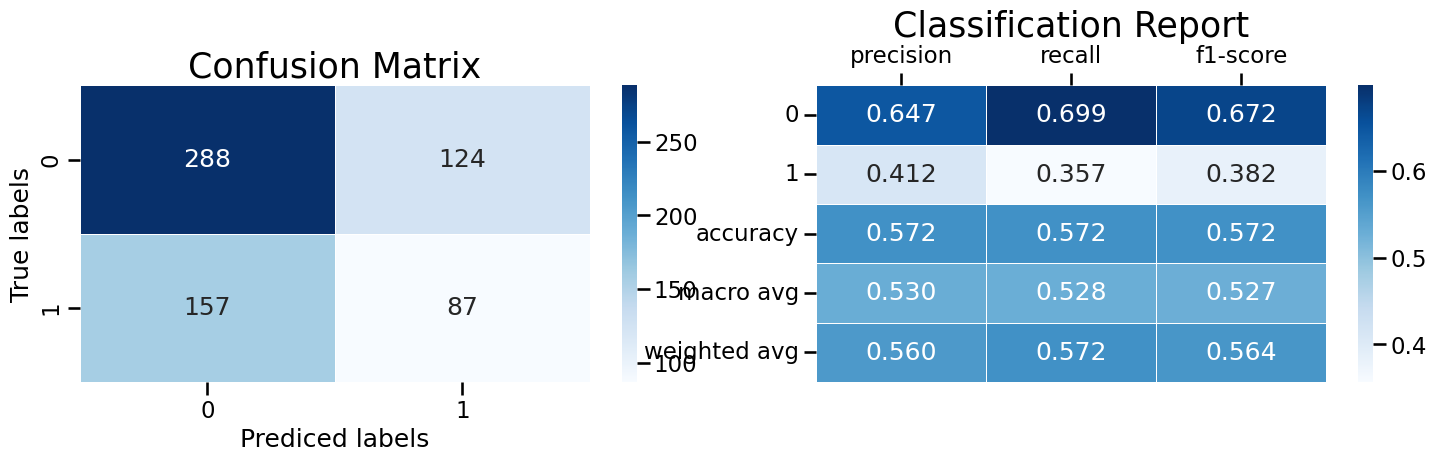

In [58]:
plot_result(y_pred_knn)

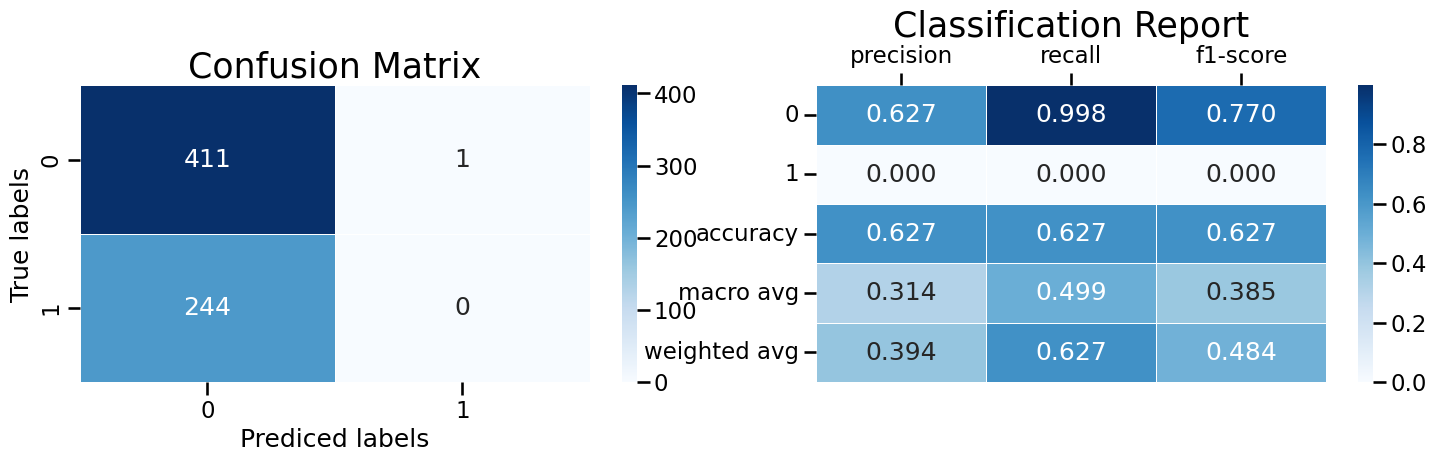

In [59]:
plot_result(y_pred_svm)

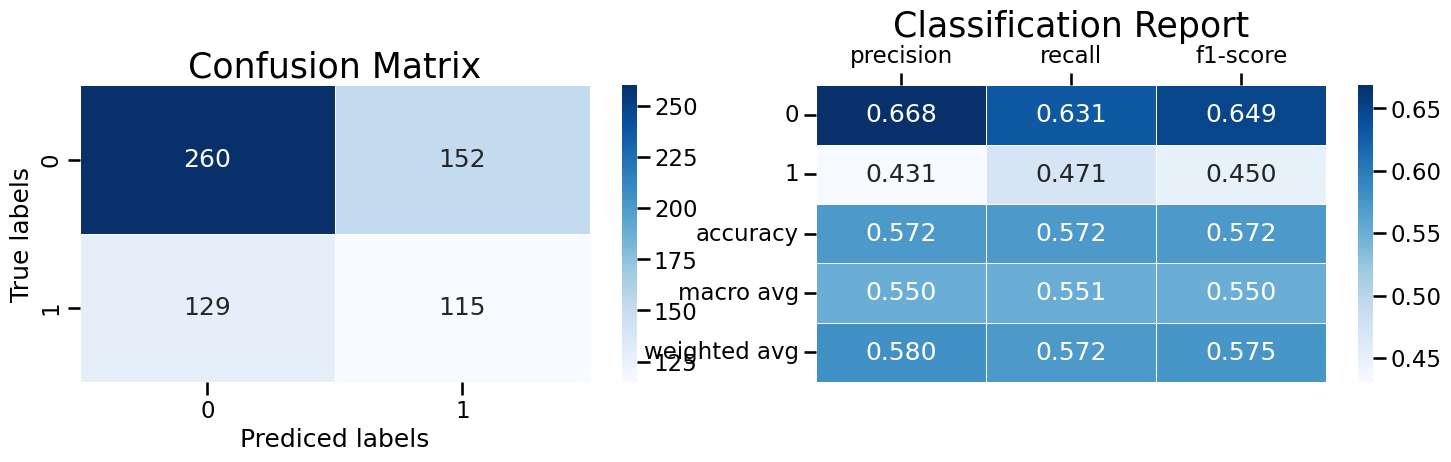

In [60]:
plot_result(y_pred_dt)

In [61]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(estimator=dt, cv=10, param_grid=parameters).fit(x_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(dt_cv.best_params_), 'blue'))


Tuned hyper parameters :
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [62]:
dt = DecisionTreeClassifier(**dt_cv.best_params_).fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

dt_score = round(dt.score(x_test, y_test), 3)


In [63]:
best_estimator = dt_cv.best_estimator_
best_estimator.fit(x_train, y_train)
y_pred_best = best_estimator.predict(x_test)
print(colored('Decision Tree Classifier Score : {}'.format(dt_score), 'green'))


Decision Tree Classifier Score : 0.61


Predictive System:

In [64]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [65]:
list1 = df.iloc[2:3, 0:2].values.flatten().tolist()
list1

[8.099124189298397, 224.23625939355776]

In [66]:
Solids = float(input('Enter the Solids Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))

Enter the Solids Value = 8.10
Enter the Turbidity Value = 224.23


In [67]:
input_data =[Solids, Turbidity]

In [68]:
df_input = std_scaler.transform([[Solids, Turbidity]])
df_input

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -2.51002728, 282.29344593]])

In [69]:
model_prediction = best_estimator.predict(df_input)
model_prediction

array([1])

In [70]:
if model_prediction[0] == 0:
    print("Water is Not SAFE for Consumption")
else:
    print("Water is SAFE for Consumption")


Water is SAFE for Consumption


In [71]:
def water_purity_tester(input_data):
    scaled_data = std_scaler.transform([input_data])
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0] == 0:
      return "Water is 'NOT SAVE' for Consumption"
    else:
      return "Water is 'SAFE' for Consumption"


In [72]:
Solids = float(input('Enter the Solids Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))

input_data = [Solids, Turbidity]
water_purity_tester(input_data)

Enter the Solids Value = 3.12
Enter the Turbidity Value = 345.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"Water is 'SAFE' for Consumption"